In [302]:
#analysis of premature years of life lost using 2017 County Health Rankings
#DATS 6103 - Individual Project 2 - Joseph Conran
#loading libraries
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from statsmodels.formula.api import ols
%matplotlib inline

In [303]:
#verify working directory and contents
print(os.getcwd())
print(os.listdir())

C:\Users\JEC\Desktop\Final
['.ipynb_checkpoints', 'Charts', 'countyHealthRankingsClean.xlsx', 'DATS 6103 - Individual Project 2 - Joseph Conran.ipynb', 'DATS 6103 - Individual Project 2 - Joseph Conran.mp4', 'DATS 6103 - Individual Project 2 - Joseph Conran.pptx', 'Extra Data', 'statePopulations.xlsx']


In [304]:
#assign the two excel spreadsheets as dataframes df1 and df2
df1 = pd.read_excel('countyHealthRankingsClean.xlsx', index_col='state')
df2 = pd.read_excel('statePopulations.xlsx', index_col='state')

In [305]:
#review head of data
df1.head()

,county,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone
state,,,,,,,,,,,,,,,,,,
Alabama,Autauga,9158.2,17.878814,17.380239,34.1,14.954122,398.2,11.016234,58.59,59.674515,5.243401,18.8,25.165611,13.719650,265.699747,10.8,14.723468,42.6
Alabama,Baldwin,7393.9,16.361973,17.937120,27.4,15.378031,341.1,16.132992,47.61,62.887664,5.486967,19.6,26.783655,11.543593,216.773078,9.6,14.702872,37.7
Alabama,Barbour,8573.1,25.020401,22.776689,44.4,11.923450,613.1,15.342094,73.50,39.266943,8.939130,45.2,56.455563,8.182393,328.659071,10.1,16.195652,35.5
Alabama,Bibb,11766.1,19.540231,19.850766,40.3,14.309652,444.2,13.564171,77.35,50.222018,6.607774,29.3,29.569672,10.219497,147.290900,10.5,13.681241,46.5
Alabama,Blount,9332.8,18.947608,21.037382,34.6,13.902888,124.4,16.475248,63.02,51.213678,5.404074,22.2,27.381214,8.489406,211.598836,11.3,11.534818,59.8


In [306]:
#review tail of data
df1.tail()

,county,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone
state,,,,,,,,,,,,,,,,,,
Wyoming,Sweetwater,6877.7,15.611944,17.600275,31.7,19.099118,232.1,14.034125,52.09,56.364906,4.601066,10.2,24.741149,9.331260,350.161133,7.1,9.502398,18.8
Wyoming,Teton,3728.2,11.857020,14.324619,12.7,22.001780,193.1,15.042744,32.79,76.123315,3.777672,7.6,21.062664,19.188836,NaN,6.3,19.380356,12.9
Wyoming,Uinta,7660.1,14.705255,18.317184,27.9,16.662460,308.6,13.085534,50.67,55.179430,4.874295,11.9,21.822620,5.740528,40.359374,6.7,11.522634,16.7
Wyoming,Washakie,7294.3,14.386224,16.552810,27.7,15.101614,224.5,16.875382,54.71,61.135612,4.025914,15.7,32.156863,19.226148,78.505260,6.4,10.374640,9.8
Wyoming,Weston,8050.5,13.545120,17.920108,29.2,16.259903,237.5,15.081909,31.14,64.053426,3.341709,13.1,24.818482,16.664352,143.392897,6.7,10.924370,26.3


In [307]:
#review head of data
df2.head()

,rankInFiftyStates,rankInAllTerritories,populationEstimate1July2016,censusPopulation10April2010,"totalSeatsInHouseofRepresentatives2013to2023Total seats in House of Representatives, 2013–2023","estimatedPopPerHouseSeat2016Estimated pop. per House seat, 2016",censusPopPerHouseSeat2010,"percentOfUSPopulationPercent of total U.S. pop., 2016[note 1]"
state,,,,,,,,
California,1,1,39250017,37254503,53,738581,702905,0.1215
Texas,2,2,27862596,25146105,36,763031,698487,0.0862
Florida,3,4,20612439,18804623,27,750788,696345,0.0638
New York,4,3,19745289,19378087,27,733177,717707,0.0611
Pennsylvania,5,6,12802503,12702887,18,711250,705688,0.0396


In [308]:
#review tail of data
df2.tail()

,rankInFiftyStates,rankInAllTerritories,populationEstimate1July2016,censusPopulation10April2010,"totalSeatsInHouseofRepresentatives2013to2023Total seats in House of Representatives, 2013–2023","estimatedPopPerHouseSeat2016Estimated pop. per House seat, 2016",censusPopPerHouseSeat2010,"percentOfUSPopulationPercent of total U.S. pop., 2016[note 1]"
state,,,,,,,,
North Dakota,47,49,757952,672591,1,756927,672591,0.0024
Alaska,48,48,741894,710249,1,741894,710231,0.0023
District of Columbia,—,51,681170,601767,1 (non-voting),—,—,0.0021
Vermont,49,50,624594,625745,1,626042,625741,0.0019
Wyoming,50,52,585501,563767,1,586107,563626,0.0018


In [309]:
#scan over data for missing values and other errors
df1.values

array([['Autauga', 9158.2, 17.878814127, ..., 10.8, 14.723467862, 42.6],
       ['Baldwin', 7393.9, 16.361972647, ..., 9.6, 14.702872348, 37.7],
       ['Barbour', 8573.1, 25.02040126, ..., 10.1, 16.195652174, 35.5],
       ..., 
       ['Uinta', 7660.1, 14.705255089, ..., 6.7, 11.522633745, 16.7],
       ['Washakie', 7294.3, 14.386223515, ..., 6.4, 10.374639769, 9.8],
       ['Weston', 8050.5, 13.545119843, ..., 6.7, 10.924369748, 26.3]], dtype=object)

In [310]:
#scan over data for missing values and other errors
df2.values

array([[1, 1, 39250017, 37254503, 53, 738581, 702905, 0.1215],
       [2, 2, 27862596, 25146105, 36, 763031, 698487, 0.0862],
       [3, 4, 20612439, 18804623, 27, 750788, 696345, 0.0638],
       [4, 3, 19745289, 19378087, 27, 733177, 717707, 0.0611],
       [5, 6, 12802503, 12702887, 18, 711250, 705688, 0.0396],
       [6, 5, 12801539, 12831549, 18, 714444, 712813, 0.0396],
       [7, 7, 11614373, 11536725, 16, 725839, 721032, 0.0359],
       [8, 9, 10310371, 9688681, 14, 729633, 691975, 0.0319],
       [9, 10, 10146788, 9535692, 13, 772523, 733498, 0.0314],
       [10, 8, 9928301, 9884129, 14, 708755, 705974, 0.0307],
       [11, 11, 8944469, 8791936, 12, 746501, 732658, 0.0277],
       [12, 12, 8411808, 8001045, 11, 762090, 727366, 0.026],
       [13, 13, 7288000, 6724543, 10, 717035, 672454, 0.0226],
       [14, 16, 6931071, 6392307, 9, 758674, 710224, 0.0215],
       [15, 14, 6811779, 6547817, 9, 754936, 727514, 0.0211],
       [16, 17, 6651194, 6346275, 9, 733367, 705123, 0.0206]

In [311]:
#average all county values into a single state value
df1 = df1.reset_index().groupby("state").mean()
df1

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone
state,,,,,,,,,,,,,,,,,
Alabama,10481.134328,22.429156,20.116403,36.128358,12.808859,581.580597,15.019570,68.770746,51.009788,7.036844,31.628358,41.135280,12.161995,368.370809,10.328358,15.407285,36.450746
Alaska,8813.506250,16.052030,21.367465,31.343478,20.740833,891.513636,24.284003,56.306250,57.973528,8.575693,18.391304,33.617313,12.008496,380.725413,NaN,27.368361,7.143478
Arizona,8845.520000,20.209318,17.508790,28.773333,15.516809,466.793333,17.553878,43.561333,54.826504,8.798509,28.833333,39.065645,6.351161,336.322314,6.693333,20.611771,25.073333
Arkansas,10011.282667,23.427719,20.835591,35.898667,12.801271,476.098667,14.323970,70.923467,49.084219,6.016345,31.214667,36.910974,12.838728,355.994550,10.049333,14.208880,30.498667
California,6350.964286,16.722000,12.684280,24.131034,18.462542,345.873684,13.310503,37.204211,59.616377,7.552945,22.246552,31.614843,6.953105,406.641286,8.637931,24.300861,31.656897
Colorado,6663.853704,13.498502,15.286907,20.682812,17.544665,255.712281,13.705556,37.748103,62.594376,4.016900,20.784375,26.843856,14.201432,181.821380,5.826563,16.710295,26.748438
Connecticut,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000
Delaware,7384.366667,16.196479,17.371865,30.500000,15.862565,488.500000,9.760460,52.296667,58.766424,5.034716,20.100000,38.425874,10.026258,489.693379,9.400000,15.828708,33.600000
District of Columbia,7666.900000,12.617528,16.238415,22.400000,26.164894,819.090137,5.935708,39.090000,80.014272,6.911645,28.300000,55.701707,28.289874,1263.376280,10.900000,22.074720,44.900000


In [312]:
#in second dataframe drop all columns except for the most recent population estimate
df2.drop(['rankInFiftyStates', 'rankInAllTerritories', 'censusPopulation10April2010', 'totalSeatsInHouseofRepresentatives2013to2023Total seats in House of Representatives, 2013–2023', 'estimatedPopPerHouseSeat2016Estimated pop. per House seat, 2016', 'censusPopPerHouseSeat2010', 'percentOfUSPopulationPercent of total U.S. pop., 2016[note 1]'], axis=1, inplace=True)
df2

,populationEstimate1July2016
state,
California,39250017
Texas,27862596
Florida,20612439
New York,19745289
Pennsylvania,12802503
Illinois,12801539
Ohio,11614373
Georgia,10310371
North Carolina,10146788


In [313]:
#merge the two dataframes and set combined frame as df
df1 = df1.copy()
df1 = df1.set_index(df2.index)
df2['populationEstimate1July2016'] = df2['populationEstimate1July2016'].astype(float)
df1['population']= df2['populationEstimate1July2016']
df = df1
df

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population
state,,,,,,,,,,,,,,,,,,
California,10481.134328,22.429156,20.116403,36.128358,12.808859,581.580597,15.019570,68.770746,51.009788,7.036844,31.628358,41.135280,12.161995,368.370809,10.328358,15.407285,36.450746,39250017.0
Texas,8813.506250,16.052030,21.367465,31.343478,20.740833,891.513636,24.284003,56.306250,57.973528,8.575693,18.391304,33.617313,12.008496,380.725413,NaN,27.368361,7.143478,27862596.0
Florida,8845.520000,20.209318,17.508790,28.773333,15.516809,466.793333,17.553878,43.561333,54.826504,8.798509,28.833333,39.065645,6.351161,336.322314,6.693333,20.611771,25.073333,20612439.0
New York,10011.282667,23.427719,20.835591,35.898667,12.801271,476.098667,14.323970,70.923467,49.084219,6.016345,31.214667,36.910974,12.838728,355.994550,10.049333,14.208880,30.498667,19745289.0
Pennsylvania,6350.964286,16.722000,12.684280,24.131034,18.462542,345.873684,13.310503,37.204211,59.616377,7.552945,22.246552,31.614843,6.953105,406.641286,8.637931,24.300861,31.656897,12802503.0
Illinois,6663.853704,13.498502,15.286907,20.682812,17.544665,255.712281,13.705556,37.748103,62.594376,4.016900,20.784375,26.843856,14.201432,181.821380,5.826563,16.710295,26.748438,12801539.0
Ohio,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000,11614373.0
Georgia,7384.366667,16.196479,17.371865,30.500000,15.862565,488.500000,9.760460,52.296667,58.766424,5.034716,20.100000,38.425874,10.026258,489.693379,9.400000,15.828708,33.600000,10310371.0
North Carolina,7666.900000,12.617528,16.238415,22.400000,26.164894,819.090137,5.935708,39.090000,80.014272,6.911645,28.300000,55.701707,28.289874,1263.376280,10.900000,22.074720,44.900000,10146788.0


In [314]:
#fill in any missing values using the pad method
#used in lieu of dropna method for educational purposes
df = df.fillna(method='pad')
df

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population
state,,,,,,,,,,,,,,,,,,
California,10481.134328,22.429156,20.116403,36.128358,12.808859,581.580597,15.019570,68.770746,51.009788,7.036844,31.628358,41.135280,12.161995,368.370809,10.328358,15.407285,36.450746,39250017.0
Texas,8813.506250,16.052030,21.367465,31.343478,20.740833,891.513636,24.284003,56.306250,57.973528,8.575693,18.391304,33.617313,12.008496,380.725413,10.328358,27.368361,7.143478,27862596.0
Florida,8845.520000,20.209318,17.508790,28.773333,15.516809,466.793333,17.553878,43.561333,54.826504,8.798509,28.833333,39.065645,6.351161,336.322314,6.693333,20.611771,25.073333,20612439.0
New York,10011.282667,23.427719,20.835591,35.898667,12.801271,476.098667,14.323970,70.923467,49.084219,6.016345,31.214667,36.910974,12.838728,355.994550,10.049333,14.208880,30.498667,19745289.0
Pennsylvania,6350.964286,16.722000,12.684280,24.131034,18.462542,345.873684,13.310503,37.204211,59.616377,7.552945,22.246552,31.614843,6.953105,406.641286,8.637931,24.300861,31.656897,12802503.0
Illinois,6663.853704,13.498502,15.286907,20.682812,17.544665,255.712281,13.705556,37.748103,62.594376,4.016900,20.784375,26.843856,14.201432,181.821380,5.826563,16.710295,26.748438,12801539.0
Ohio,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000,11614373.0
Georgia,7384.366667,16.196479,17.371865,30.500000,15.862565,488.500000,9.760460,52.296667,58.766424,5.034716,20.100000,38.425874,10.026258,489.693379,9.400000,15.828708,33.600000,10310371.0
North Carolina,7666.900000,12.617528,16.238415,22.400000,26.164894,819.090137,5.935708,39.090000,80.014272,6.911645,28.300000,55.701707,28.289874,1263.376280,10.900000,22.074720,44.900000,10146788.0


In [315]:
#review the row count in new frame
df.count()

yearsPotentialLifeLostRate      51
percentFair/PoorHealth          51
percentSmokers                  51
percentObese                    51
percentExcessiveDrinking        51
chlamydiaRate                   51
percentUninsured                51
preventableHospitalStays        51
percentSomeCollege              51
percentUnemployed               51
percentChildrenInPoverty        51
percentSingleParentHH           51
socialAssociationRate           51
violentCrimeRate                51
averageDailyPollutionPM2.5      51
percentSevereHousingProblems    51
percentLongCommuteDriveAlone    51
population                      51
dtype: int64

In [316]:
#review data types
print(df.dtypes)

yearsPotentialLifeLostRate      float64
percentFair/PoorHealth          float64
percentSmokers                  float64
percentObese                    float64
percentExcessiveDrinking        float64
chlamydiaRate                   float64
percentUninsured                float64
preventableHospitalStays        float64
percentSomeCollege              float64
percentUnemployed               float64
percentChildrenInPoverty        float64
percentSingleParentHH           float64
socialAssociationRate           float64
violentCrimeRate                float64
averageDailyPollutionPM2.5      float64
percentSevereHousingProblems    float64
percentLongCommuteDriveAlone    float64
population                      float64
dtype: object


In [317]:
#review sumary statistics of data
df.describe()

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,5.100000e+01
mean,7692.982602,16.074858,17.237663,29.805045,17.187280,370.379792,13.188792,54.333134,59.209128,5.609141,21.797332,32.830347,12.898332,273.660300,8.676875,15.725037,30.296238,6.336192e+06
std,1527.112683,3.498172,2.748126,3.895455,3.002122,149.483240,4.523070,13.394747,7.291391,1.400262,5.920344,6.496698,4.718184,179.001143,1.436129,3.929153,6.937209,7.244175e+06
min,5311.962500,11.258781,10.002967,20.682812,11.623369,188.057692,4.000573,25.307500,46.454136,2.878045,13.137500,18.942922,3.870741,97.042976,5.817647,8.995621,7.143478,5.855010e+05
25%,6550.728203,13.362516,15.455179,27.177784,15.292560,265.539112,9.956558,47.125489,53.058043,4.714150,16.943750,29.534971,10.538119,167.291811,7.512500,13.309536,25.101439,1.757121e+06
50%,7659.048864,15.289021,16.918168,29.966667,17.544665,329.514706,13.310503,52.150952,59.616377,5.488305,20.581250,31.666202,12.432610,239.489927,8.875904,15.407285,31.558824,4.436974e+06
75%,8825.956534,18.983362,18.645053,32.222486,19.029023,424.009868,16.317753,64.033753,63.848600,6.696412,26.978969,34.370659,14.178363,360.917272,9.729050,16.930905,34.815000,7.109536e+06
max,11012.307407,24.039237,23.527802,36.807317,26.164894,891.513636,24.284003,91.707333,80.014272,8.798509,35.652439,55.701707,28.289874,1263.376280,11.378409,27.445724,44.900000,3.925002e+07


In [318]:
#look at shape of data tuple
print(df.shape)

(51, 18)


In [319]:
#create new column that converts YPLL value into a per capita value 
#convert year to days to also make the data more relatable
df = df.copy()
df['potentialLifeDaysLostPerCapita'] = (df['yearsPotentialLifeLostRate'].divide(df['population'])*365)
df

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population,potentialLifeDaysLostPerCapita
state,,,,,,,,,,,,,,,,,,,
California,10481.134328,22.429156,20.116403,36.128358,12.808859,581.580597,15.019570,68.770746,51.009788,7.036844,31.628358,41.135280,12.161995,368.370809,10.328358,15.407285,36.450746,39250017.0,0.097468
Texas,8813.506250,16.052030,21.367465,31.343478,20.740833,891.513636,24.284003,56.306250,57.973528,8.575693,18.391304,33.617313,12.008496,380.725413,10.328358,27.368361,7.143478,27862596.0,0.115457
Florida,8845.520000,20.209318,17.508790,28.773333,15.516809,466.793333,17.553878,43.561333,54.826504,8.798509,28.833333,39.065645,6.351161,336.322314,6.693333,20.611771,25.073333,20612439.0,0.156634
New York,10011.282667,23.427719,20.835591,35.898667,12.801271,476.098667,14.323970,70.923467,49.084219,6.016345,31.214667,36.910974,12.838728,355.994550,10.049333,14.208880,30.498667,19745289.0,0.185063
Pennsylvania,6350.964286,16.722000,12.684280,24.131034,18.462542,345.873684,13.310503,37.204211,59.616377,7.552945,22.246552,31.614843,6.953105,406.641286,8.637931,24.300861,31.656897,12802503.0,0.181066
Illinois,6663.853704,13.498502,15.286907,20.682812,17.544665,255.712281,13.705556,37.748103,62.594376,4.016900,20.784375,26.843856,14.201432,181.821380,5.826563,16.710295,26.748438,12801539.0,0.190001
Ohio,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000,11614373.0,0.166937
Georgia,7384.366667,16.196479,17.371865,30.500000,15.862565,488.500000,9.760460,52.296667,58.766424,5.034716,20.100000,38.425874,10.026258,489.693379,9.400000,15.828708,33.600000,10310371.0,0.261416
North Carolina,7666.900000,12.617528,16.238415,22.400000,26.164894,819.090137,5.935708,39.090000,80.014272,6.911645,28.300000,55.701707,28.289874,1263.376280,10.900000,22.074720,44.900000,10146788.0,0.275794


In [320]:
#save the new dataframe as an excel spreadsheet
writer = pd.ExcelWriter('countyHealthRankingsProcessed.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='df')
writer.save()

In [321]:
#sort the dataframe by YPLL rate
df = df.copy()
df = df.sort_values(['yearsPotentialLifeLostRate'], ascending=[True])
df

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population,potentialLifeDaysLostPerCapita
state,,,,,,,,,,,,,,,,,,,
Ohio,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000,11614373.0,0.166937
Hawaii,5325.000000,12.796316,14.012711,25.380000,19.047684,282.740000,6.924442,49.636000,72.060454,5.529529,14.600000,29.767896,10.699167,155.897010,7.760000,17.903107,34.200000,1428557.0,1.360551
Minnesota,5362.450000,13.262490,14.832001,23.285714,19.988932,237.000000,4.000573,49.667143,69.985414,5.353557,15.307143,33.650726,11.180039,389.770888,8.457143,19.300420,33.014286,5519952.0,0.354585
Alabama,5718.878824,12.304967,15.779076,29.601149,20.746471,222.158333,7.259440,41.181839,67.093573,4.350224,14.634483,27.707141,20.625116,133.511436,9.302299,12.456451,26.294253,4863300.0,0.429213
Virginia,5741.100000,13.093971,13.726515,21.900000,19.843814,366.250000,6.695634,25.307500,69.907022,3.926311,17.800000,31.045171,5.668466,269.867068,9.928302,27.445724,30.060000,8411808.0,0.249114
Iowa,5853.970000,11.628547,15.232545,28.170000,19.003194,253.800000,12.218967,45.912000,65.698067,3.419216,14.200000,31.193748,11.252983,197.495434,7.920000,16.112463,34.830000,3134693.0,0.681629
Utah,5867.042857,14.687289,14.232813,26.604762,17.646150,321.314286,11.782748,52.150952,65.424155,6.028846,15.004762,29.321067,9.089458,258.148864,9.585714,21.919269,41.261905,3051217.0,0.701841
South Dakota,5885.864286,11.258781,15.327516,25.678571,18.886866,336.200000,6.602990,42.659286,61.306524,4.214728,15.214286,31.977934,12.703812,107.726760,7.550000,16.782272,33.692857,865454.0,2.482328
Arkansas,6034.572581,13.689508,16.362186,27.524194,19.229840,335.829032,8.510276,52.310484,61.843297,5.576987,20.954839,33.567518,11.012730,211.472466,8.706452,17.085436,33.393548,2988248.0,0.737094


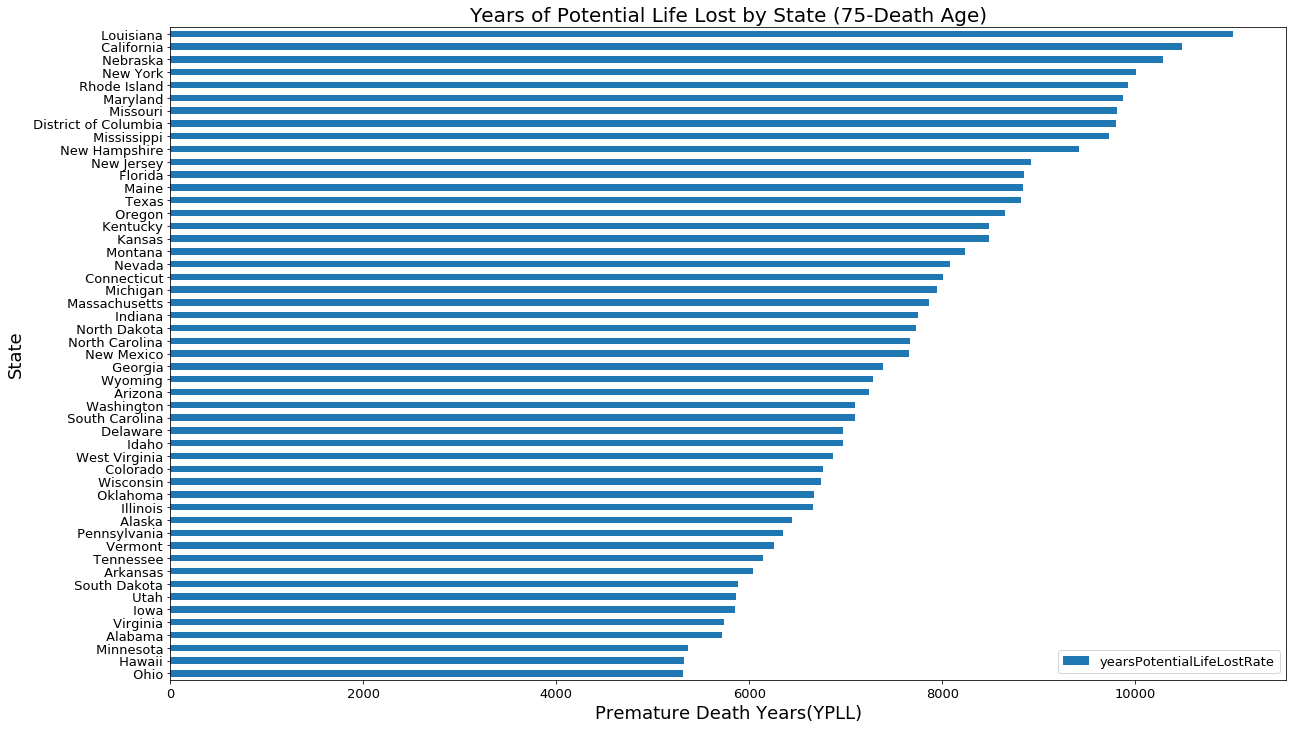

In [322]:
#draw a bar chart looking at the ypll rate in states by descending order 
chart = df['yearsPotentialLifeLostRate']
ax = chart.plot.barh(figsize=(20, 12), fontsize=13, stacked=True)
plt.legend(loc='best', fontsize=13)
ax.set_title('Years of Potential Life Lost by State (75-Death Age)', fontsize=20)
ax.set_xlabel('Premature Death Years(YPLL)', fontsize=18)
ax.set_ylabel('State', fontsize=18)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FA7E07B8>], dtype=object)

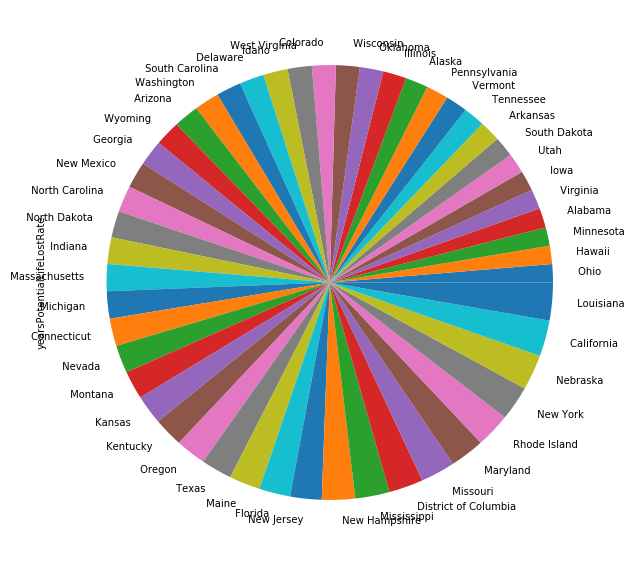

In [323]:
#visualize data in pie chart
df['yearsPotentialLifeLostRate'].plot.pie(subplots=True, figsize=(10, 10))

In [324]:
df = df.copy()
df = df.sort_values(['potentialLifeDaysLostPerCapita'], ascending=[True])
df

,yearsPotentialLifeLostRate,percentFair/PoorHealth,percentSmokers,percentObese,percentExcessiveDrinking,chlamydiaRate,percentUninsured,preventableHospitalStays,percentSomeCollege,percentUnemployed,percentChildrenInPoverty,percentSingleParentHH,socialAssociationRate,violentCrimeRate,averageDailyPollutionPM2.5,percentSevereHousingProblems,percentLongCommuteDriveAlone,population,potentialLifeDaysLostPerCapita
state,,,,,,,,,,,,,,,,,,,
California,10481.134328,22.429156,20.116403,36.128358,12.808859,581.580597,15.019570,68.770746,51.009788,7.036844,31.628358,41.135280,12.161995,368.370809,10.328358,15.407285,36.450746,39250017.0,0.097468
Texas,8813.506250,16.052030,21.367465,31.343478,20.740833,891.513636,24.284003,56.306250,57.973528,8.575693,18.391304,33.617313,12.008496,380.725413,10.328358,27.368361,7.143478,27862596.0,0.115457
Florida,8845.520000,20.209318,17.508790,28.773333,15.516809,466.793333,17.553878,43.561333,54.826504,8.798509,28.833333,39.065645,6.351161,336.322314,6.693333,20.611771,25.073333,20612439.0,0.156634
Ohio,5311.962500,12.508916,13.475817,25.587500,19.386464,288.375000,7.203247,47.657500,68.048868,5.488305,13.137500,29.681609,9.260171,252.175945,8.225000,17.020267,34.800000,11614373.0,0.166937
Pennsylvania,6350.964286,16.722000,12.684280,24.131034,18.462542,345.873684,13.310503,37.204211,59.616377,7.552945,22.246552,31.614843,6.953105,406.641286,8.637931,24.300861,31.656897,12802503.0,0.181066
New York,10011.282667,23.427719,20.835591,35.898667,12.801271,476.098667,14.323970,70.923467,49.084219,6.016345,31.214667,36.910974,12.838728,355.994550,10.049333,14.208880,30.498667,19745289.0,0.185063
Illinois,6663.853704,13.498502,15.286907,20.682812,17.544665,255.712281,13.705556,37.748103,62.594376,4.016900,20.784375,26.843856,14.201432,181.821380,5.826563,16.710295,26.748438,12801539.0,0.190001
Virginia,5741.100000,13.093971,13.726515,21.900000,19.843814,366.250000,6.695634,25.307500,69.907022,3.926311,17.800000,31.045171,5.668466,269.867068,9.928302,27.445724,30.060000,8411808.0,0.249114
Georgia,7384.366667,16.196479,17.371865,30.500000,15.862565,488.500000,9.760460,52.296667,58.766424,5.034716,20.100000,38.425874,10.026258,489.693379,9.400000,15.828708,33.600000,10310371.0,0.261416


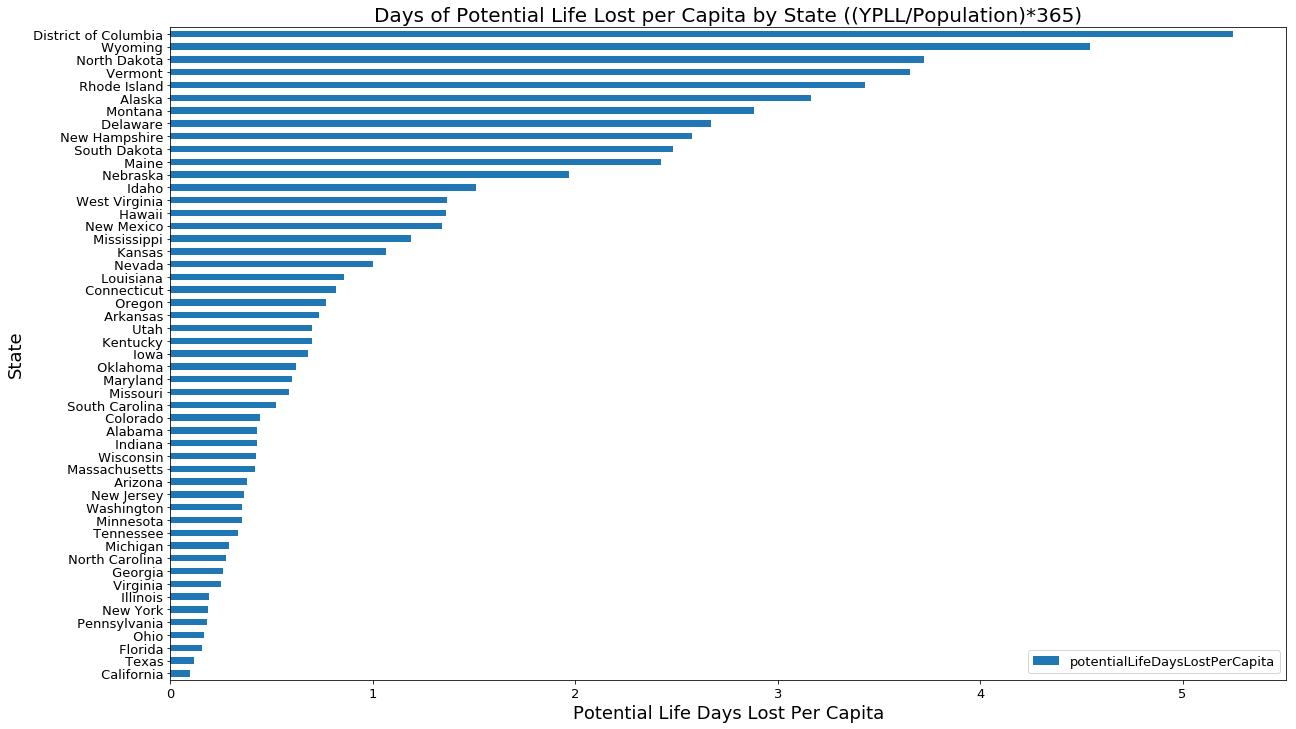

In [325]:
#draw line graph analyzing per capita data
chart = df['potentialLifeDaysLostPerCapita']
ax = chart.plot.barh(figsize=(20, 12), fontsize=13, stacked=True)
plt.legend(loc='best', fontsize=13)
ax.set_title('Days of Potential Life Lost per Capita by State ((YPLL/Population)*365)', fontsize=20)
ax.set_xlabel('Potential Life Days Lost Per Capita', fontsize=18)
ax.set_ylabel('State', fontsize=18)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FAB33A20>], dtype=object)

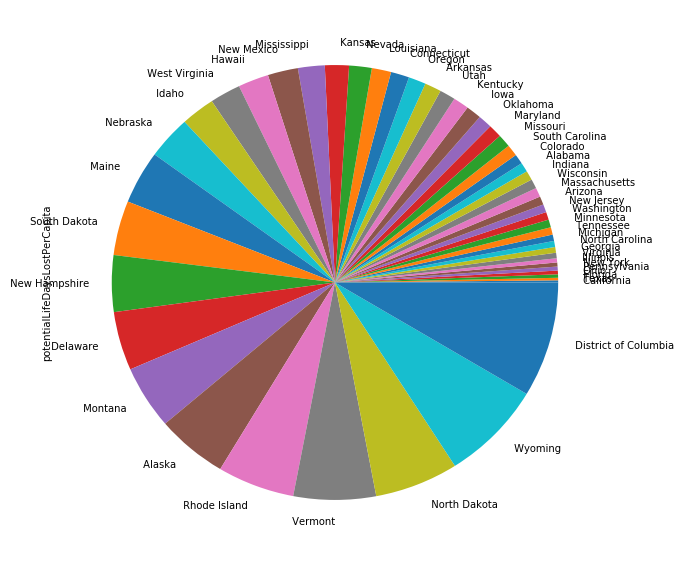

In [326]:
#visualize per capita data in pie chart
df['potentialLifeDaysLostPerCapita'].plot.pie(subplots=True, figsize=(10, 10))

In [327]:
#select variables for regression model
variables = ['potentialLifeDaysLostPerCapita', 'violentCrimeRate', 'percentObese', 'percentSmokers', 'percentChildrenInPoverty', 'percentSomeCollege', 'population']
dfVariables = df[variables]
dfVariables

,potentialLifeDaysLostPerCapita,violentCrimeRate,percentObese,percentSmokers,percentChildrenInPoverty,percentSomeCollege,population
state,,,,,,,
California,0.097468,368.370809,36.128358,20.116403,31.628358,51.009788,39250017.0
Texas,0.115457,380.725413,31.343478,21.367465,18.391304,57.973528,27862596.0
Florida,0.156634,336.322314,28.773333,17.508790,28.833333,54.826504,20612439.0
Ohio,0.166937,252.175945,25.587500,13.475817,13.137500,68.048868,11614373.0
Pennsylvania,0.181066,406.641286,24.131034,12.684280,22.246552,59.616377,12802503.0
New York,0.185063,355.994550,35.898667,20.835591,31.214667,49.084219,19745289.0
Illinois,0.190001,181.821380,20.682812,15.286907,20.784375,62.594376,12801539.0
Virginia,0.249114,269.867068,21.900000,13.726515,17.800000,69.907022,8411808.0
Georgia,0.261416,489.693379,30.500000,17.371865,20.100000,58.766424,10310371.0


In [328]:
#sort variables by potentialLifeDaysLostPerCapita
dfVariables = dfVariables.sort_values(['potentialLifeDaysLostPerCapita'], ascending=[False])
dfVariables

,potentialLifeDaysLostPerCapita,violentCrimeRate,percentObese,percentSmokers,percentChildrenInPoverty,percentSomeCollege,population
state,,,,,,,
District of Columbia,5.249544,257.983435,35.440000,23.527802,26.681818,48.081612,681170.0
Wyoming,4.540906,161.390462,26.734783,16.899517,13.313043,64.511247,585501.0
North Dakota,3.720729,180.111808,29.408271,17.024932,20.864662,58.488847,757952.0
Vermont,3.656109,138.349157,31.470833,16.992940,17.187500,62.368497,624594.0
Rhode Island,3.429607,380.773368,32.694737,22.170297,27.469474,46.962782,1056426.0
Alaska,3.167198,196.524179,29.128205,15.468670,20.866667,60.738399,741894.0
Montana,2.883892,262.359360,28.702756,15.826583,24.684252,50.631973,1042520.0
Delaware,2.673521,160.448164,25.982759,10.002967,15.920690,64.038246,952065.0
New Hampshire,2.574852,527.818480,35.139130,19.206128,30.404348,52.904840,1334795.0


In [329]:
#drop unnecessary population column
dfVariables.drop(['population'], axis=1, inplace=True)
dfVariables

,potentialLifeDaysLostPerCapita,violentCrimeRate,percentObese,percentSmokers,percentChildrenInPoverty,percentSomeCollege
state,,,,,,
District of Columbia,5.249544,257.983435,35.440000,23.527802,26.681818,48.081612
Wyoming,4.540906,161.390462,26.734783,16.899517,13.313043,64.511247
North Dakota,3.720729,180.111808,29.408271,17.024932,20.864662,58.488847
Vermont,3.656109,138.349157,31.470833,16.992940,17.187500,62.368497
Rhode Island,3.429607,380.773368,32.694737,22.170297,27.469474,46.962782
Alaska,3.167198,196.524179,29.128205,15.468670,20.866667,60.738399
Montana,2.883892,262.359360,28.702756,15.826583,24.684252,50.631973
Delaware,2.673521,160.448164,25.982759,10.002967,15.920690,64.038246
New Hampshire,2.574852,527.818480,35.139130,19.206128,30.404348,52.904840


In [330]:
#create dataframe looking at top and bottom 5 states
dfVariables =dfVariables.copy()
topfive = dfVariables.head(5)
botfive = dfVariables.tail(5)
topandbot = pd.concat([topfive,botfive])
topandbot

,potentialLifeDaysLostPerCapita,violentCrimeRate,percentObese,percentSmokers,percentChildrenInPoverty,percentSomeCollege
state,,,,,,
District of Columbia,5.249544,257.983435,35.440000,23.527802,26.681818,48.081612
Wyoming,4.540906,161.390462,26.734783,16.899517,13.313043,64.511247
North Dakota,3.720729,180.111808,29.408271,17.024932,20.864662,58.488847
Vermont,3.656109,138.349157,31.470833,16.992940,17.187500,62.368497
Rhode Island,3.429607,380.773368,32.694737,22.170297,27.469474,46.962782
Pennsylvania,0.181066,406.641286,24.131034,12.684280,22.246552,59.616377
Ohio,0.166937,252.175945,25.587500,13.475817,13.137500,68.048868
Florida,0.156634,336.322314,28.773333,17.508790,28.833333,54.826504
Texas,0.115457,380.725413,31.343478,21.367465,18.391304,57.973528


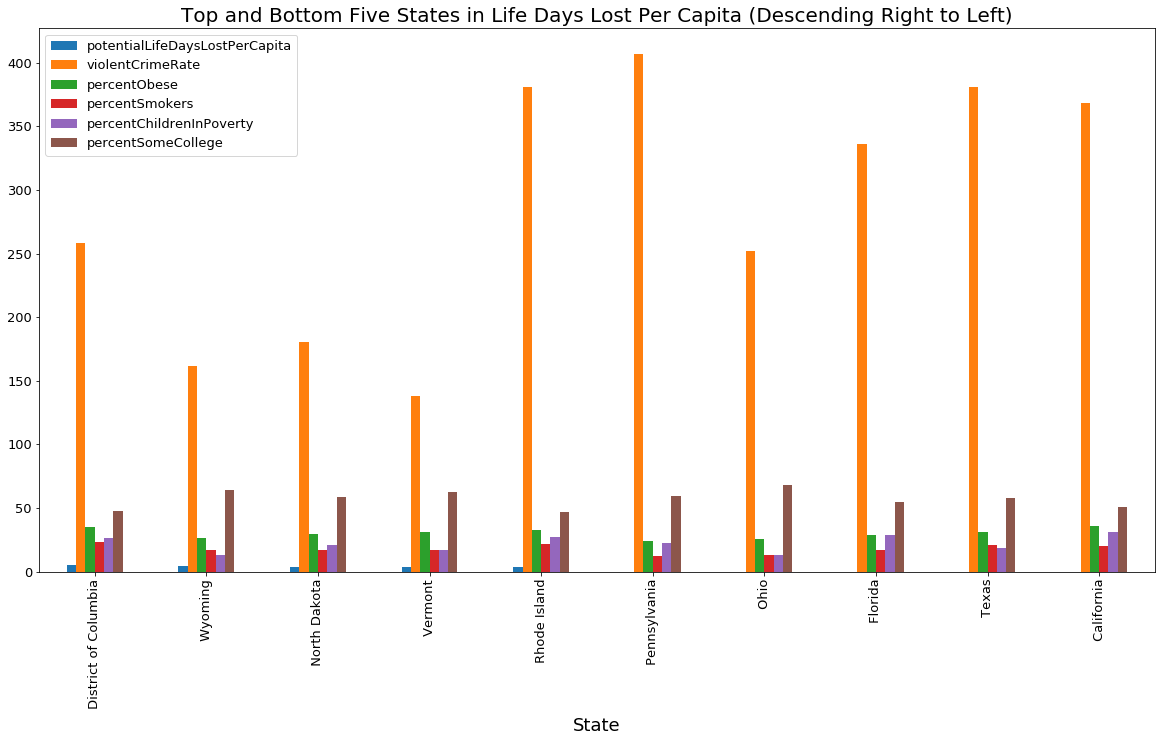

In [331]:
#plot bar graph looking at how variables differ in top and bottom five
ax = topandbot.plot.bar(figsize=(20, 10), fontsize=13, stacked=False)
plt.legend(loc='best', fontsize=13)
ax.set_title('Top and Bottom Five States in Life Days Lost Per Capita (Descending Right to Left)', fontsize=20)
ax.set_xlabel('State', fontsize=18)
ax.set_ylabel('', fontsize=13)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FB2FCE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000137FC8F5320>]], dtype=object)

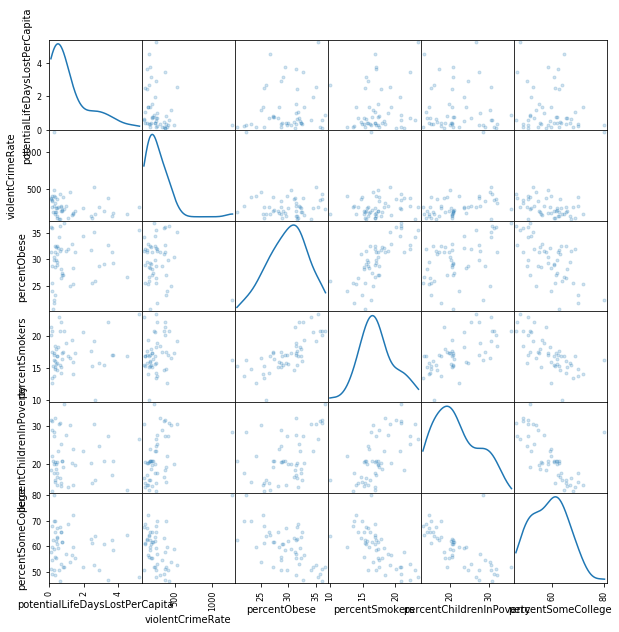

In [332]:
#draw scatter matrix to review scatterplots and data distribution
scatter_matrix(dfVariables, alpha=0.2, figsize=(10, 10), diagonal='kde')

In [333]:
#create ols regression with per capita ypll as the regressand
model = ols("potentialLifeDaysLostPerCapita ~ violentCrimeRate + percentObese + percentSmokers + percentChildrenInPoverty + percentSomeCollege", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     potentialLifeDaysLostPerCapita   R-squared:                       0.104
Model:                                        OLS   Adj. R-squared:                  0.005
Method:                             Least Squares   F-statistic:                     1.050
Date:                            Tue, 25 Apr 2017   Prob (F-statistic):              0.400
Time:                                    15:29:31   Log-Likelihood:                -81.100
No. Observations:                              51   AIC:                             174.2
Df Residuals:                                  45   BIC:                             185.8
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                    4.7779      4.199      1.138      0.261        -3.680    13.235
violentCrimeRate            -0.0007      0.001     -0.490      0.626        -0.003     0.002
percentObese                -0.0278      0.074     -0.375      0.710        -0.177     0.121
percentSmokers               0.1017      0.114      0.894      0.376        -0.127     0.331
percentChildrenInPoverty    -0.0661      0.055     -1.200      0.236        -0.177     0.045
percentSomeCollege          -0.0487      0.044     -1.112      0.272        -0.137     0.040
==============================================================================
Omnibus:                       11.189   Durbin-Watson:                   0.237
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.803
Skew:                           1.168   Prob(JB):                      0.00274
Kurtosis:                       3.317   Cond. No.                     7.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
###